In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

/Users/zzheng/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs
!mkdir -p outputs/generator2

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:12,  9.64it/s]                         


Epoch 1 of 100
Generator loss: 0.23330817, Discriminator loss: 0.44280788


118it [00:11,  9.94it/s]                         


Epoch 2 of 100
Generator loss: 0.00006147, Discriminator loss: 0.00011211


118it [00:12,  9.44it/s]                         


Epoch 3 of 100
Generator loss: 0.00007220, Discriminator loss: 0.00008827


118it [00:12,  9.82it/s]                         


Epoch 4 of 100
Generator loss: 0.00007962, Discriminator loss: 0.00010012


118it [00:12,  9.51it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


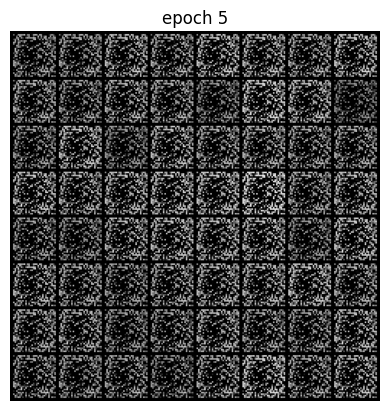

Epoch 5 of 100
Generator loss: 0.00113616, Discriminator loss: 0.02025912


118it [00:12,  9.25it/s]                         


Epoch 6 of 100
Generator loss: 0.00000071, Discriminator loss: 0.00016187


118it [00:13,  9.04it/s]                         


Epoch 7 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000107


118it [00:12,  9.31it/s]                         


Epoch 8 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000068


118it [00:12,  9.33it/s]                         


Epoch 9 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000062


118it [00:12,  9.43it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


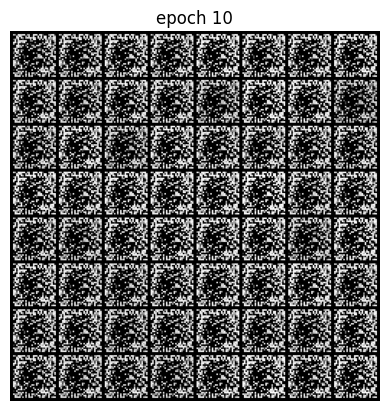

Epoch 10 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000053


118it [00:12,  9.36it/s]                         


Epoch 11 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000042


118it [00:12,  9.67it/s]                         


Epoch 12 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000047


118it [00:12,  9.69it/s]                         


Epoch 13 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000063


118it [00:12,  9.68it/s]                         


Epoch 14 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000032


118it [00:12,  9.46it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


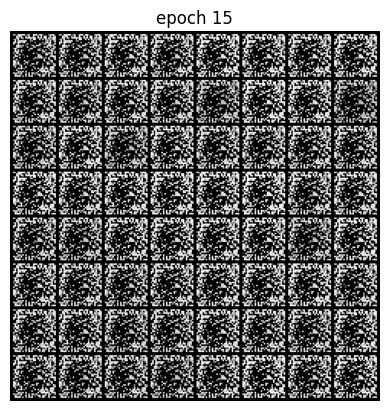

Epoch 15 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000026


118it [00:12,  9.48it/s]                         


Epoch 16 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000026


118it [00:12,  9.74it/s]                         


Epoch 17 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000023


118it [00:12,  9.41it/s]                         


Epoch 18 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000026


118it [00:12,  9.37it/s]                         


Epoch 19 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000022


118it [00:12,  9.58it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


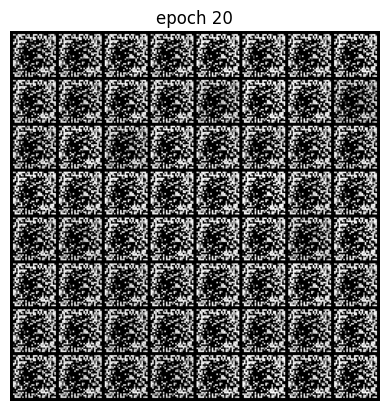

Epoch 20 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000029


118it [00:12,  9.42it/s]                         


Epoch 21 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000020


118it [00:12,  9.66it/s]                         


Epoch 22 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000021


118it [00:12,  9.37it/s]                         


Epoch 23 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000025


118it [00:12,  9.57it/s]                         


Epoch 24 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000013


118it [00:12,  9.35it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


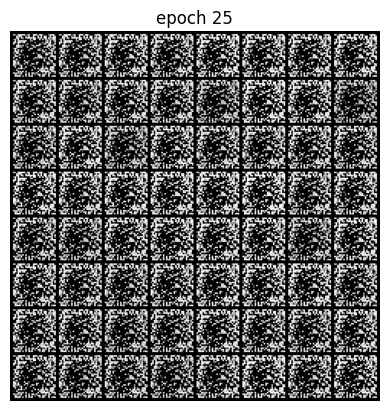

Epoch 25 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000015


118it [00:12,  9.39it/s]                         


Epoch 26 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000011


118it [00:12,  9.52it/s]                         


Epoch 27 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000010


118it [00:12,  9.44it/s]                         


Epoch 28 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000010


118it [00:12,  9.59it/s]                         


Epoch 29 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000010


118it [00:12,  9.66it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


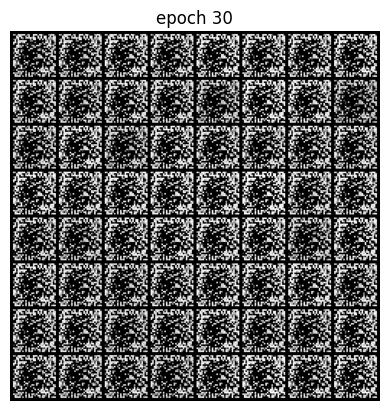

Epoch 30 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000010


118it [00:12,  9.33it/s]                         


Epoch 31 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000010


118it [00:12,  9.46it/s]                         


Epoch 32 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000007


118it [00:12,  9.63it/s]                         


Epoch 33 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000009


118it [00:12,  9.59it/s]                         


Epoch 34 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000007


118it [00:12,  9.65it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


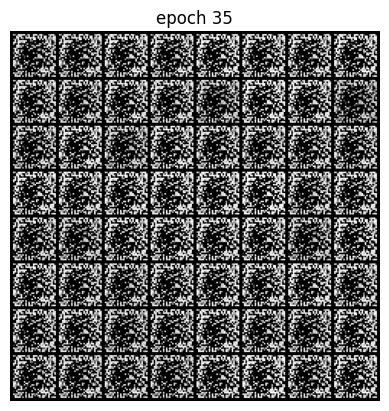

Epoch 35 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000008


118it [00:12,  9.53it/s]                         


Epoch 36 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000007


118it [00:12,  9.65it/s]                         


Epoch 37 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000005


118it [00:12,  9.49it/s]                         


Epoch 38 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000005


118it [00:12,  9.40it/s]                         


Epoch 39 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000009


118it [00:12,  9.37it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


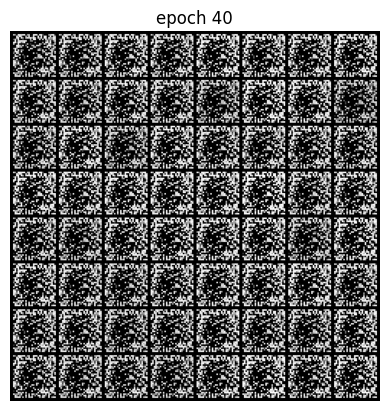

Epoch 40 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000004


118it [00:12,  9.40it/s]                         


Epoch 41 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000005


118it [00:12,  9.53it/s]                         


Epoch 42 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000004


118it [00:12,  9.70it/s]                         


Epoch 43 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000004


118it [00:12,  9.58it/s]                         


Epoch 44 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000004


118it [00:12,  9.79it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


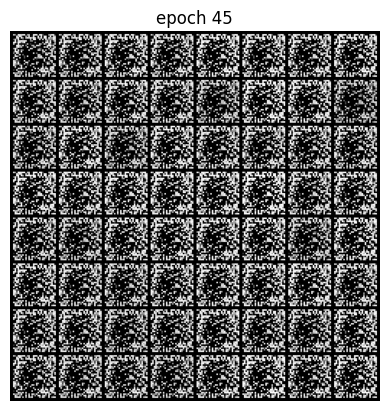

Epoch 45 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000004


118it [00:12,  9.75it/s]                         


Epoch 46 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000003


118it [00:12,  9.75it/s]                         


Epoch 47 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000003


118it [00:12,  9.83it/s]                         


Epoch 48 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000003


118it [00:12,  9.34it/s]                         


Epoch 49 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000003


118it [00:12,  9.33it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


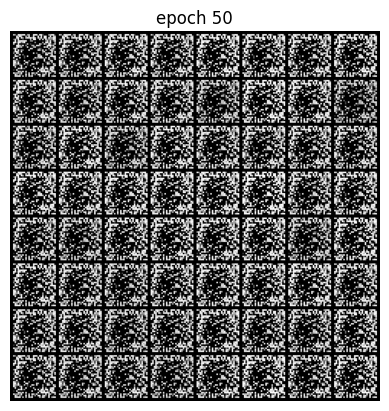

Epoch 50 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000003


118it [00:12,  9.43it/s]                         


Epoch 51 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000003


118it [00:12,  9.43it/s]                         


Epoch 52 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000002


118it [00:12,  9.33it/s]                         


Epoch 53 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000002


118it [00:12,  9.47it/s]                         


Epoch 54 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000002


118it [00:12,  9.57it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


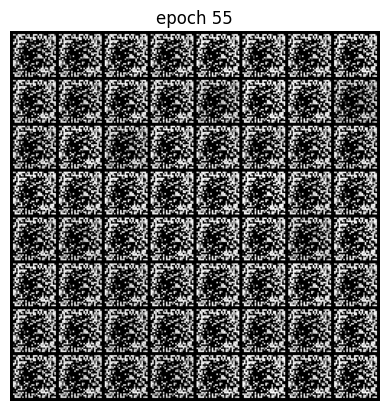

Epoch 55 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000002


118it [00:12,  9.47it/s]                         


Epoch 56 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000002


118it [00:12,  9.50it/s]                         


Epoch 57 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000002


118it [00:12,  9.71it/s]                         


Epoch 58 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000002


118it [00:10, 10.82it/s]                         


Epoch 59 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000002


118it [00:11, 10.56it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


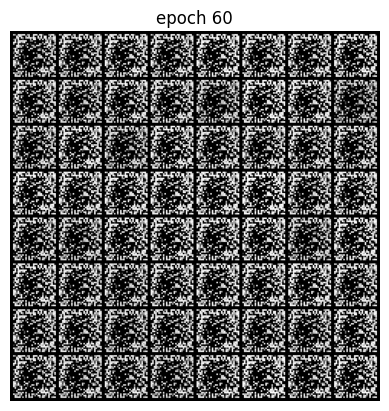

Epoch 60 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000002


118it [00:11, 10.59it/s]                         


Epoch 61 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000001


118it [00:11, 10.58it/s]                         


Epoch 62 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000001


118it [00:11, 10.59it/s]                         


Epoch 63 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000001


118it [00:11,  9.83it/s]                         


Epoch 64 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000001


118it [00:12,  9.72it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


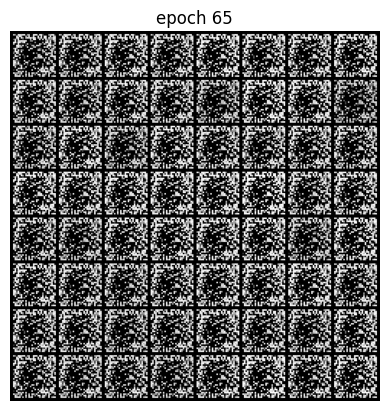

Epoch 65 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000001


118it [00:12,  9.49it/s]                         


Epoch 66 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000001


118it [00:12,  9.35it/s]                         


Epoch 67 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000001


118it [00:12,  9.56it/s]                         


Epoch 68 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000001


118it [00:12,  9.42it/s]                         


Epoch 69 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000004


118it [00:12,  9.50it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


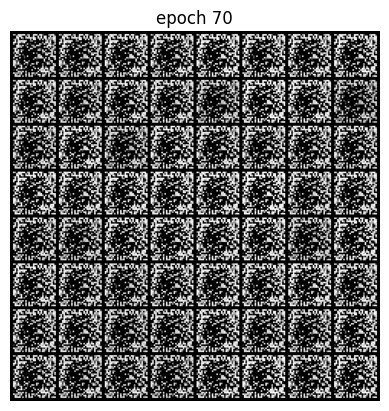

Epoch 70 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000001


118it [00:12,  9.60it/s]                         


Epoch 71 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000001


118it [00:12,  9.45it/s]                         


Epoch 72 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000001


118it [00:12,  9.52it/s]                         


Epoch 73 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000001


118it [00:12,  9.82it/s]                         


Epoch 74 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000001


118it [00:11, 10.51it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


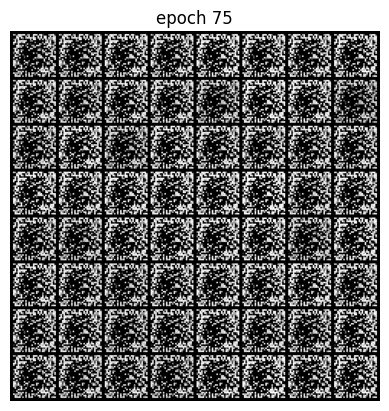

Epoch 75 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000001


118it [00:11, 10.21it/s]                         


Epoch 76 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000001


118it [00:12,  9.39it/s]                         


Epoch 77 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000001


118it [00:12,  9.60it/s]                         


Epoch 78 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000001


118it [00:11,  9.95it/s]                         


Epoch 79 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 11.06it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


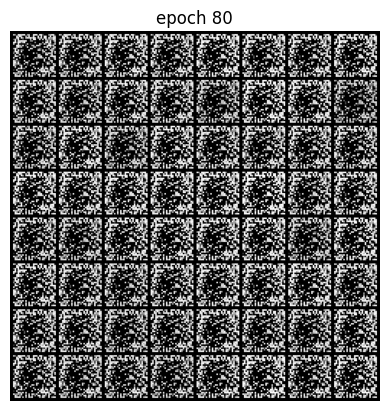

Epoch 80 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000001


118it [00:11, 10.69it/s]                         


Epoch 81 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 10.96it/s]                         


Epoch 82 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 10.86it/s]                         


Epoch 83 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 11.06it/s]                         


Epoch 84 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000001


118it [00:10, 10.84it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


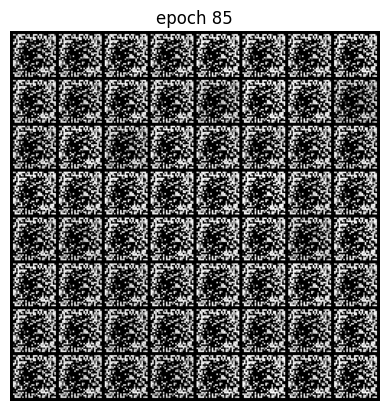

Epoch 85 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.65it/s]                         


Epoch 86 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.57it/s]                         


Epoch 87 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 10.77it/s]                         


Epoch 88 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.60it/s]                         


Epoch 89 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.66it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


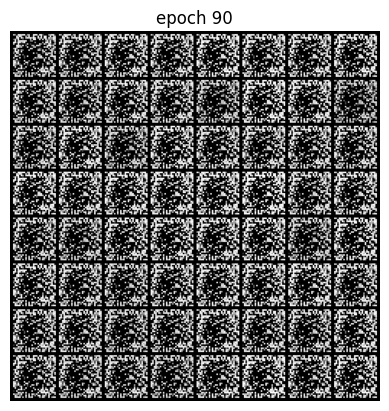

Epoch 90 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 10.82it/s]                         


Epoch 91 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 10.82it/s]                         


Epoch 92 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 10.89it/s]                         


Epoch 93 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 10.96it/s]                         


Epoch 94 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 11.12it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


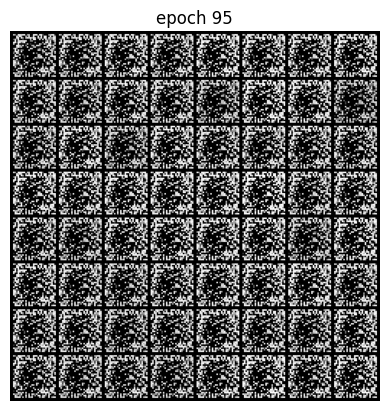

Epoch 95 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 10.94it/s]                         


Epoch 96 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.46it/s]                         


Epoch 97 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 10.83it/s]                         


Epoch 98 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 10.90it/s]                         


Epoch 99 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 10.85it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


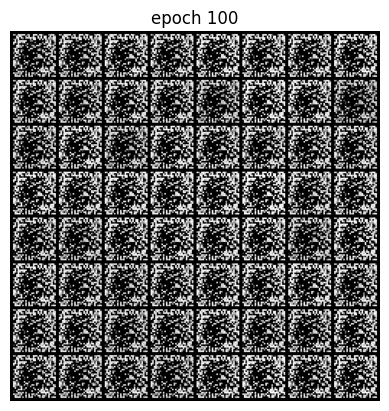

Epoch 100 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


In [14]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    noise_in_training = create_noise(batch_size, nz)
    generated_data = generator(noise_in_training)
    discriminator_generator_data = discriminator(generated_data)
    return criterion(discriminator_generator_data, true_label)
    
    
    ######################################
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    noise_in_training = create_noise(batch_size, nz)
    generated_data = generator(noise_in_training)
    discriminator_data = discriminator(output)
    discriminator_loss_data = criterion(discriminator_data, label_real(discriminator_data.shape[0]))    
    discriminator_generator_data = discriminator(generated_data.detach())
    discriminator_loss_generator = criterion(discriminator_generator_data, label_fake(batch_size))
    return discriminator_loss_data + discriminator_loss_generator
    
    
    ######################################
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        data_x = data[0]
        data_y = data[1]

        optim_d.zero_grad()
        
        discriminator_loss_value = discriminator_loss(data_x,None) 
        # noise_in_training = create_noise(batch_size, nz)
        # generated_data = generator(noise_in_training)
        # discriminator_data = discriminator(data_x)
        # discriminator_loss_data = discriminator_loss(discriminator_data,label_real(discriminator_data.shape[0]))    
        # discriminator_generator_data = discriminator(generated_data.detach())
        # discriminator_loss_generator = discriminator_loss(discriminator_generator_data, label_fake(batch_size))
        # discriminator_loss_value = (discriminator_loss_data + discriminator_loss_generator)
        discriminator_loss_value = discriminator_loss(data_x,None)
        discriminator_loss_value.backward()
        optim_d.step()
        loss_d = loss_d + discriminator_loss_value
                
        optim_g.zero_grad()
        
        # noise_in_training = create_noise(batch_size, nz)
        # generated_data = generator(noise_in_training)
        # discriminator_generator_data = discriminator(generated_data)
        # generator_loss_value = generator_loss(discriminator_generator_data, label_fake(batch_size))
        generator_loss_value = generator_loss(None, label_fake(batch_size))
        (-generator_loss_value).backward()
        optim_g.step()
        loss_g = loss_g + generator_loss_value  
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/generator2/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [15]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator2/generator.pth')

DONE TRAINING


In [16]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator2/generator_images.gif', imgs)

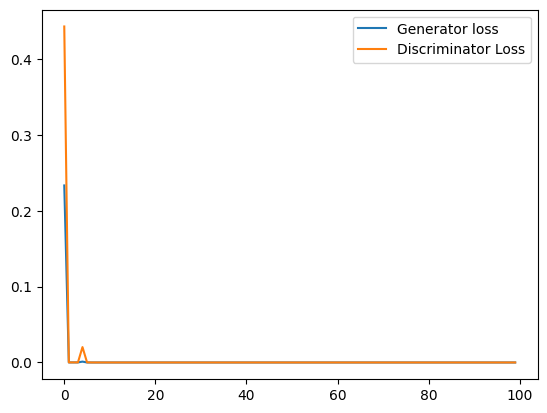

In [17]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot([g.item() for g in losses_g], label='Generator loss')
plt.plot([d.item() for d in losses_d], label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/generator2/loss.png')